In [1]:
# Module 3 Final Project
# Kai Graham

Will be following the Cross Industry Standard Process for Data Mining (CRISP-DM) methodology, with the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

### 1. Business Understanding
 - Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
 - What business problem(s) will this Data Science project solve for the organization?
 - What problems are inside the scope of this project?
 - What problems are outside the scope of this project?
 - What data sources are available to us?
 - What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
 - Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

We will be building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company.  

As we are hoping ot provide insights into customer churn, the likely stakeholders of this project will include the management team at the telecom business, customer service personnel, and sales reps.  These stakeholders will likely benefit greatest from our insights, and identifying customers with a high likelihood of churning will enable the sales / customer service teams to perform any proactive reachout they can to reduce the likelihood of churning.

### 2. Data Understanding
 - What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
 - Who controls the data sources, and what steps are needed to get access to the data?
 - What is our target?
 - What predictors are available to us?
 - What data types are the predictors we'll be working with?
 - What is the distribution of our data?
 - How many observations does our dataset contain? Do we have a lot of data? Only a little?
 - Do we have enough data to build a model? Will we need to use resampling methods?
 - How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

The data available to us comes from a dataset provided to us - - originaly from Kaggle.  In a real-life scenario we would likely be working directly with the telecom business itself, as they would be the ones controlling the data and able to provide access for us.  Additionally, in a more real-world scenario, it is likely more data would be available to us as course of business continued and more customers churned. 

In [2]:
# start with EDA to better understand the data we will be working with
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load dataset
df = pd.read_csv('telecom_churn.csv')

# examine dataset to ensure it loaded correctly
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
# examine dataset further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From looking at the above summary of our dataset, we see that the total number of observations we have is 3333, with 20 total columns, one of which is the "churn" column representing our target variable.  The remaining columns will be evaluated as features in building a classifier to predict whether a customer will churn or not. 

In [5]:
# look at summary statistics of numeric columns
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [6]:
# identify target and predictor variables into new dataframes
target = df['churn']
predictors = df.drop('churn', axis=1)

Predictor variables are all numeric types except for 'state', 'phone number', 'international plan', and 'voice mail plan'.

In [7]:
# breakdown of target variable to see the split
target.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [8]:
target.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

From this, we know there is some class imbalance, with >85% of all values labeled as False, or non-churn members.  This means, that if our model labeled every tdata point as False, we would hae >85% accuracy.  We will keep this in mind for later when we begin to build our models, and iterate to hopefully find better results than this. 

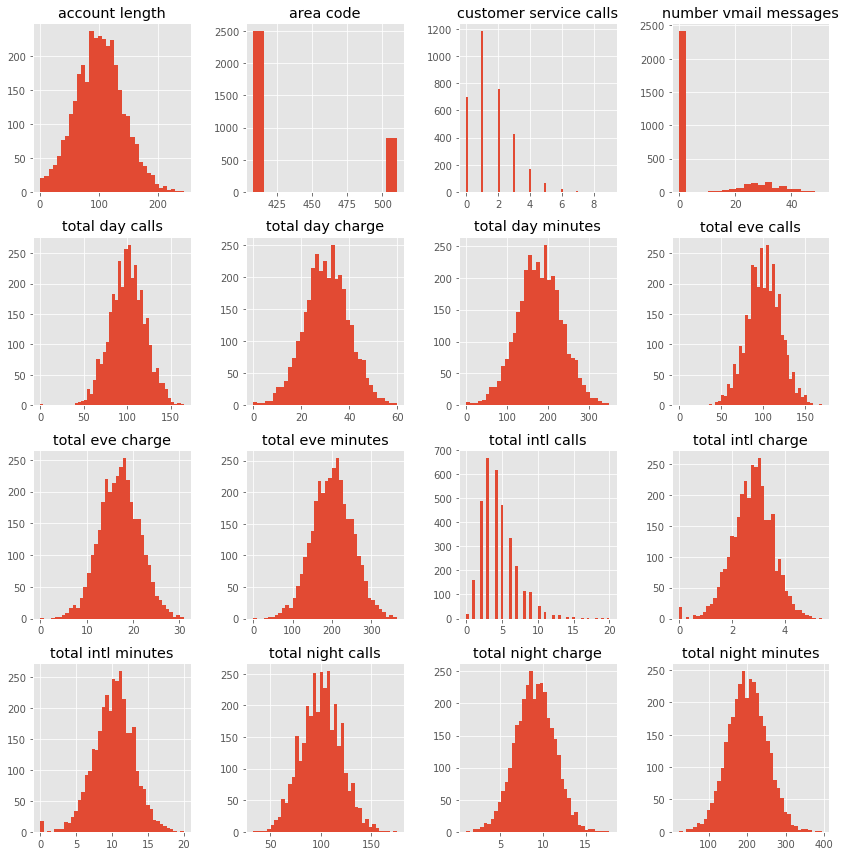

In [9]:
# look at distributions of all numeric predictor columns
plt.style.use('ggplot')
predictors.hist(figsize=(12, 12), bins='auto');
plt.tight_layout()

The majority of predictor columns look fairly normally distributed.  Additionally, combined with examining the summary stats presented above, the data all looks to be on a fairly uniform scale, which makes sense as a majority of the feature columns provided are based on the # of minutes.

In [10]:
# Start examining relationships between churn and our feature columns - - to start, separate into two 
# dataframes, one for customers who churned and one for those who didn't
# this will enable us to potentially identify some differences between churned customers and those that don't churn

In [11]:
# split into a churned_df and non_churned_df
churned_df = df.loc[df['churn'] == True]
non_churned_df = df.loc[df['churn'] == False]

In [12]:
# check value counts and examine heads to make sure it worked
churned_df['churn'].value_counts(normalize=True)

True    1.0
Name: churn, dtype: float64

In [13]:
non_churned_df['churn'].value_counts(normalize=True)

False    1.0
Name: churn, dtype: float64

In [14]:
churned_df.head()

state  account length  area code phone number international plan  \
10    IN              65        415     329-6603                 no   
15    NY             161        415     351-7269                 no   
21    CO              77        408     393-7984                 no   
33    AZ              12        408     360-1596                 no   
41    MD             135        408     383-6029                yes   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
10              no                      0              129.1              137   
15              no                      0              332.9               67   
21              no                      0               62.4               89   
33              no                      0              249.6              118   
41             yes                     41              173.1               85   

    total day charge  ...  total eve calls  total eve charge  \
10             21.95  ...               83             19.42   
15             56.59  ...               97             27.01   
21             10.61  ...              121             14.44   
33             42.43  ...              119             21.45   
41             29.43  ...              107             17.33   

    total night minutes  total night calls  total night charge  \
10                208.8                111                9.40   
15                160.6                128                7.23   
21                209.6                 64                9.43   
33                280.2                 90               12.61   
41                122.2                 78                5.50   

    total intl minutes  total intl calls  total intl charge  \
10                12.7                 6               3.43   
15                 5.4                 9               1.46   
21                 5.7                 6               1.54   
33                11.8                 3               3.19   
41                14.6                15               3.94   

    customer service calls  churn  
10                       4   True  
15                       4   True  
21                       5   True  
33                       1   True  
41                       0   True  

[5 rows x 21 columns]

In [15]:
non_churned_df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

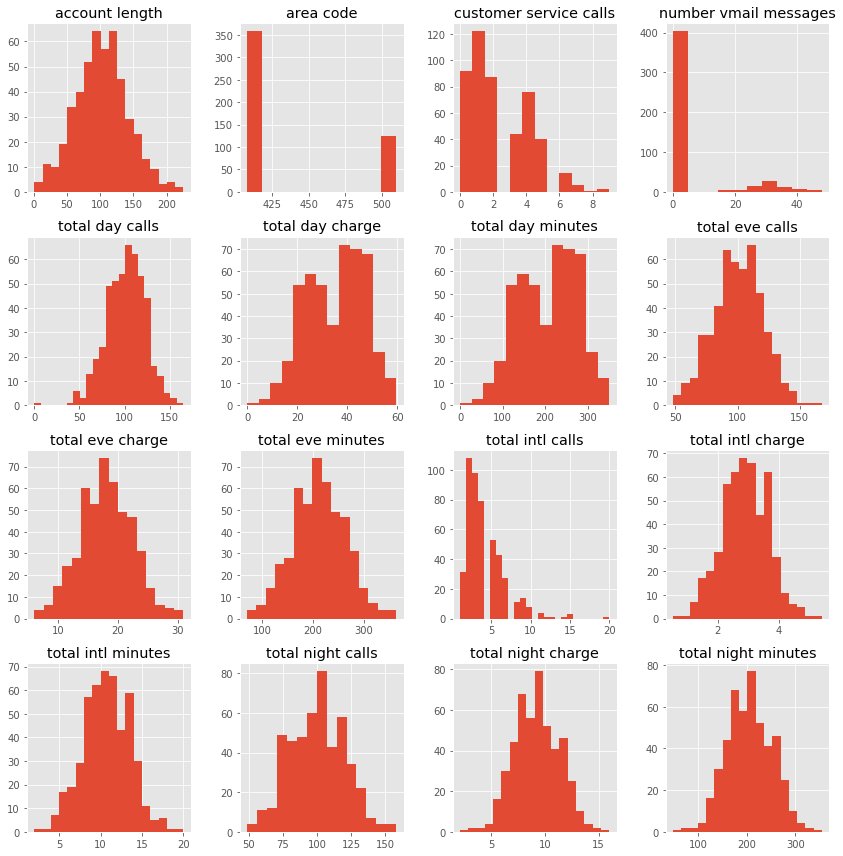

In [16]:
# replot histograms of both churn and non-churn Dataframes to see if there is anything clearly different between
# the two distributions
churned_df.drop('churn', axis=1).hist(figsize=(12, 12), bins='auto');
plt.tight_layout()

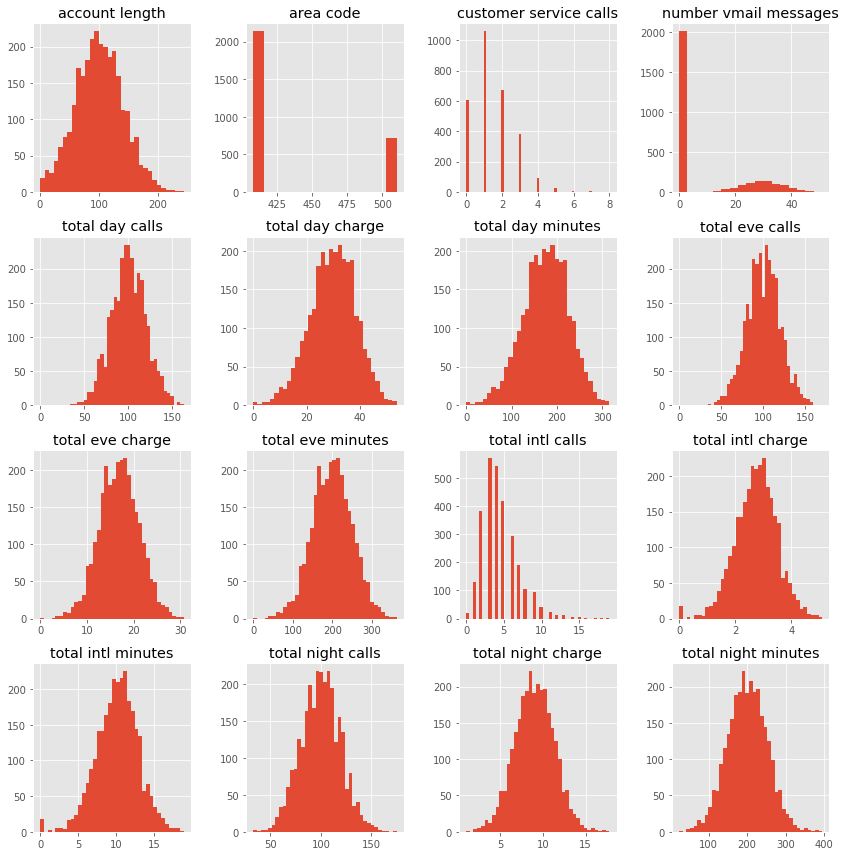

In [17]:
non_churned_df.drop('churn', axis=1).hist(figsize=(12, 12), bins='auto');
plt.tight_layout()

From first glance, there appears to be a pretty significant difference in the number of customer service calls from churned customers vs. non-churned customers, with churned customers appearing to have higher numbers of customer service calls.

In [18]:
# look at distribution of non-numeric columns, with the exception of phone-number as phone-number is essentially
# just the customer ID
# check if any duplicates in customer ID as this would signify a customer that churned and came back or a new 
# customer joining with a previous customer's phone number
df['phone number'].duplicated().any()

False

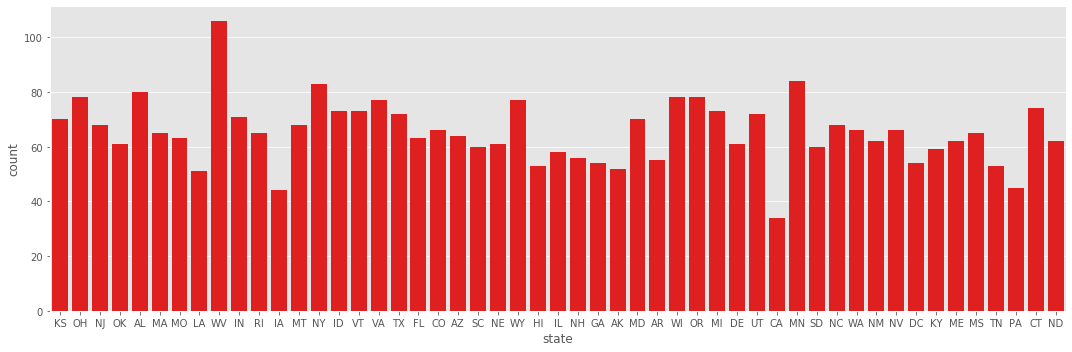

In [19]:
# look at distributions of categorical data
plt.figure(figsize=(15, 5))
sns.countplot(df['state'], color='red')
plt.tight_layout()
plt.show()

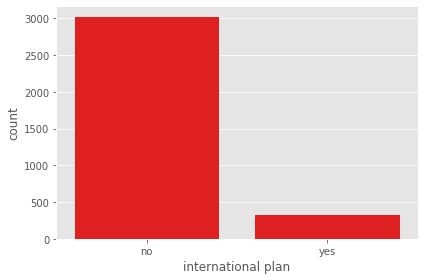

In [20]:
sns.countplot(df['international plan'], color='red')
plt.tight_layout()
plt.show()

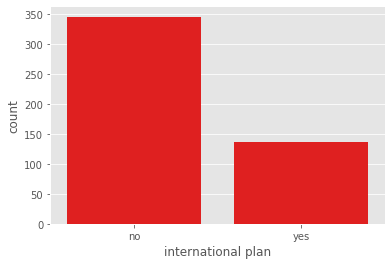

In [21]:
# repeat for churned and non-churned DataFrames
sns.countplot(churned_df['international plan'], color='red')
plt.show()

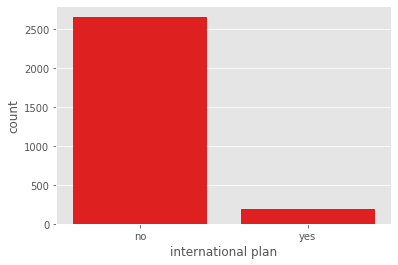

In [22]:
sns.countplot(non_churned_df['international plan'], color='red')

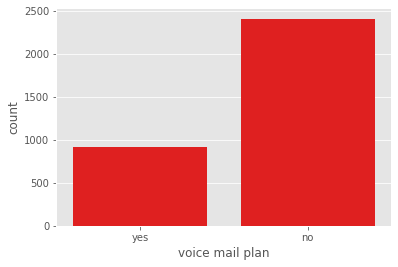

In [23]:
# repeat for voice mail plan
sns.countplot(df['voice mail plan'], color='red')
plt.show()

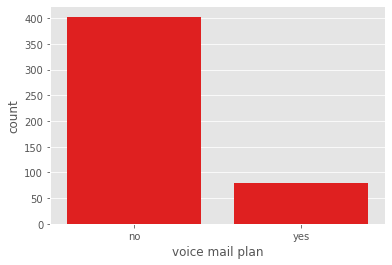

In [24]:
sns.countplot(churned_df['voice mail plan'], color='red')
plt.show()

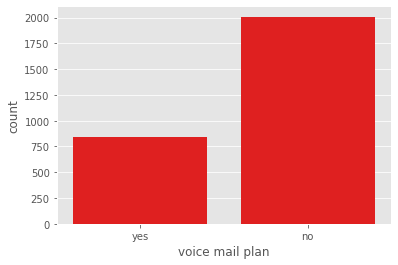

In [25]:
sns.countplot(non_churned_df['voice mail plan'], color='red')
plt.show()

In [26]:
# There seems to be a larger percentage of customers using voicemail plans in the non-churned df

In [27]:
# look at how state, international plan, and voice mail plan are related to churn
# start with state
state_crosstab = pd.crosstab(df['state'], df['churn'], normalize='index')
state_crosstab

churn     False     True 
state                    
AK     0.942308  0.057692
AL     0.900000  0.100000
AR     0.800000  0.200000
AZ     0.937500  0.062500
CA     0.735294  0.264706
CO     0.863636  0.136364
CT     0.837838  0.162162
DC     0.907407  0.092593
DE     0.852459  0.147541
FL     0.873016  0.126984
GA     0.851852  0.148148
HI     0.943396  0.056604
IA     0.931818  0.068182
ID     0.876712  0.123288
IL     0.913793  0.086207
IN     0.873239  0.126761
KS     0.814286  0.185714
KY     0.864407  0.135593
LA     0.921569  0.078431
MA     0.830769  0.169231
MD     0.757143  0.242857
ME     0.790323  0.209677
MI     0.780822  0.219178
MN     0.821429  0.178571
MO     0.888889  0.111111
MS     0.784615  0.215385
MT     0.794118  0.205882
NC     0.838235  0.161765
ND     0.903226  0.096774
NE     0.918033  0.081967
NH     0.839286  0.160714
NJ     0.735294  0.264706
NM     0.903226  0.096774
NV     0.787879  0.212121
NY     0.819277  0.180723
OH     0.871795  0.128205
OK     0.852459  0.147541
OR     0.858974  0.141026
PA     0.822222  0.177778
RI     0.907692  0.092308
SC     0.766667  0.233333
SD     0.866667  0.133333
TN     0.905660  0.094340
TX     0.750000  0.250000
UT     0.861111  0.138889
VA     0.935065  0.064935
VT     0.890411  0.109589
WA     0.787879  0.212121
WI     0.910256  0.089744
WV     0.905660  0.094340
WY     0.883117  0.116883

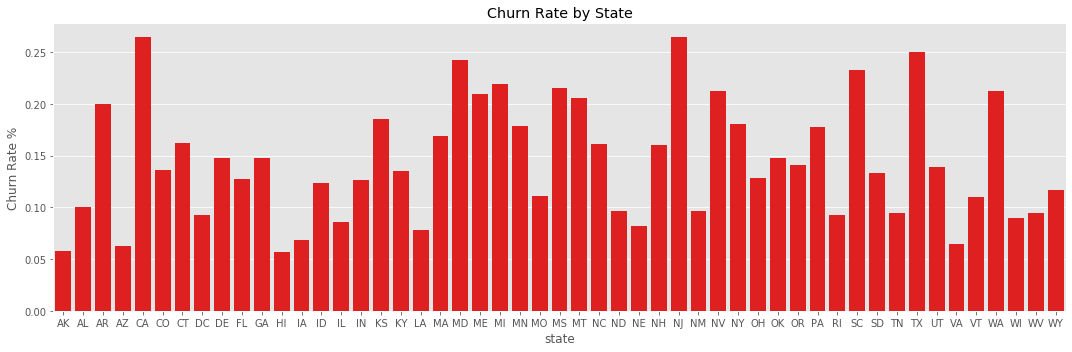

In [28]:
# a little hard to see which states are correlated with highest churn rates (True churn / total # in that category)
# plot to better visualize
# create a barplot
plt.figure(figsize=(15, 5))
sns.barplot(state_crosstab.index, y=state_crosstab[1], color='red')
plt.title('Churn Rate by State')
plt.ylabel('Churn Rate %')
plt.tight_layout()
plt.show()

In [29]:
# sort and replot to get a better sense of highest churn states
sorted_state_churn = state_crosstab[1]
sorted_state_churn = sorted_state_churn.reset_index()
sorted_state_churn.columns = ['state', 'churn_rate']

In [30]:
# sort values based on churn rate
sorted_state_churn.sort_values('churn_rate', inplace=True)

Text(0.5, 1.0, 'Sorted Churn Rate by State')

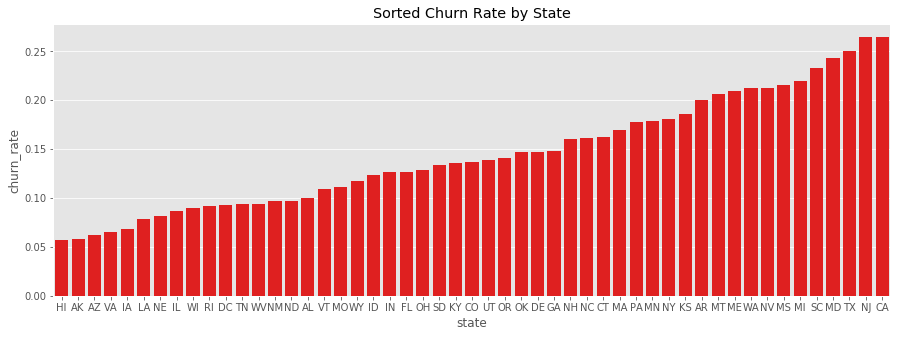

In [31]:
# replot
plt.figure(figsize=(15, 5))
ax = sns.barplot(sorted_state_churn['state'], sorted_state_churn['churn_rate'], color='red')
plt.title("Sorted Churn Rate by State")

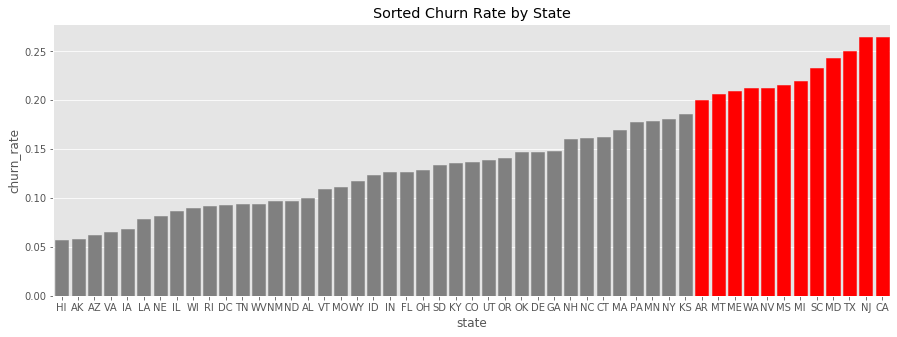

In [32]:
# replot but this time highlight every state that has higher than a 20% churn rate in red
# set up logic for highlighting certain bars

plt.figure(figsize=(15, 5))
ax = sns.barplot(sorted_state_churn['state'], sorted_state_churn['churn_rate'], color='red')
plt.title("Sorted Churn Rate by State")

for bar in ax.patches:
    if bar.get_height() >= 0.20:
        bar.set_color('red')
    else:
        bar.set_color('grey')

plt.show()

The states highlighted in red above are thsoe with churn rates higher than 0.20 (ratio of True churn to total).  These states include Arkansas, Montana, Maine, Washington, Nevada, Mississippi, Missouri, South Carolina, Maryland, Texas, New Jersey, and California.  This seems like a fairly eclectic mix, will need to dig in further.

In [33]:
# look at international plan and see if there is a relation with higher or lower churn
int_plan_crosstab = pd.crosstab(df['international plan'], df['churn'], normalize='index')
int_plan_crosstab

churn                  False     True 
international plan                    
no                  0.885050  0.114950
yes                 0.575851  0.424149

In [34]:
# looking at the above, we can see that churn looks to be significantly higher for customers who have international
# plans vs. those who do not (42% churn vs. 11.5% churn)

In [35]:
# run the same for voice mail plan
vm_plan_crosstab = pd.crosstab(df['voice mail plan'], df['churn'], normalize='index')
vm_plan_crosstab

churn               False     True 
voice mail plan                    
no               0.832849  0.167151
yes              0.913232  0.086768

In [36]:
# In this scenario, it looks like customers who have voice mail plans are related with lower churn 
# than those without voice mail plans (8.7% vs. 16.7%)

In [37]:
# we now have a fairly good sense of which states are associated with higher churn, as well as some data
# supporting the fact that voice mail plans are associated with lower churn, while international plans are
# associated with higher churn

In [38]:
# we have now looked at the distributions of our numeric columns and the relationship between our cat columns
# and churn

In [39]:
# visualize pairplot, setting hue equal to churn - - this should help identify patterns as we look at relationships
# of other variables

In [40]:
# sns.pairplot(df, hue='churn')
# Uncomment to plot pairplot - - takes a while to run

In [41]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [42]:
# from the above pairplot, we can see some relations in our variables.  
# total day minutes, total day calls, and total day charge
# replot pairplot with these variables
# plot_vars = df[['churn', 'total day minutes', 'total day calls', 'total day charge']]
# sns.pairplot(plot_vars, hue='churn')
# plt.show()

# uncomment - - takes a long time to run

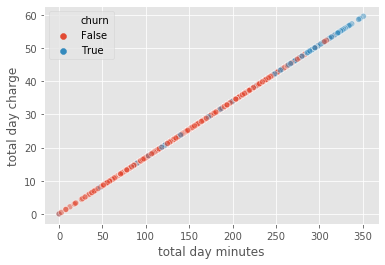

In [43]:
# clear linear relationships between total day charge and total day minutes;
# replot this one relationship
sns.scatterplot('total day minutes', 'total day charge', hue='churn', data=df, alpha=0.5)
plt.show()

In [44]:
# it makes sense that the total day charge is calc'ed off the total day minutes
# from looking at the above, we can see that there seems to be a relationship between higher total day minutes, 
# higher total day charge, and those that churned (blue dots in top right quadrant)

In [45]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [46]:
# combine day, eve, night into one
# plot_vars = df[['churn', 'total eve minutes', 'total eve calls', 'total eve charge', 
#                 'total night minutes', 'total night calls', 'total night charge', 
#                 'total day minutes', 'total day calls', 'total day charge']]
# sns.pairplot(plot_vars, hue='churn', plot_kws={'alpha':0.5})
# plt.show()

# uncomment - takes a while to run

From looking at the above pairplot, it appears, that total day minutes and total day charge may be perfectly correlated, as is the case for total eve minutes and total eve charge, total night minutes and total night charge, and total intl minutes and total intl charge.  Additionally, it looks like the majority of users that churn are not on either extreme of usage (calls, minutes, charges), whereas those that tend to not churn are near either showing heavy usage or very light usage.  

In [47]:
# replot, but this time plot kde plots on uppers
# ax = sns.PairGrid(df, 
#                   vars=['total day calls', 'total day minutes', 
#                         'total eve calls', 'total eve minutes',
#                         'total night calls', 'total night minutes'],
#                   hue='churn')

# ax.map_lower(plt.scatter, alpha=0.5)
# ax.map_diag(plt.hist, alpha=0.5)
# ax.map_upper(sns.kdeplot)

# uncomment - takes a long time to run

In [48]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [49]:
# separately look at account length and number of vmail messages to see if there is a relation with churn
# plot_vars = df[['account length', 'number vmail messages', 'churn']]
# sns.pairplot(plot_vars, hue='churn')

# uncomment takes a long time to run

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [51]:
# boxplots to see relationship between numerical vars
num_cols = ['account length', 'area code', 'number vmail messages', 
            'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

In [52]:
# translate churn column into 1 if they churn and 0 if not
df['churn'] = df['churn'].astype('int')

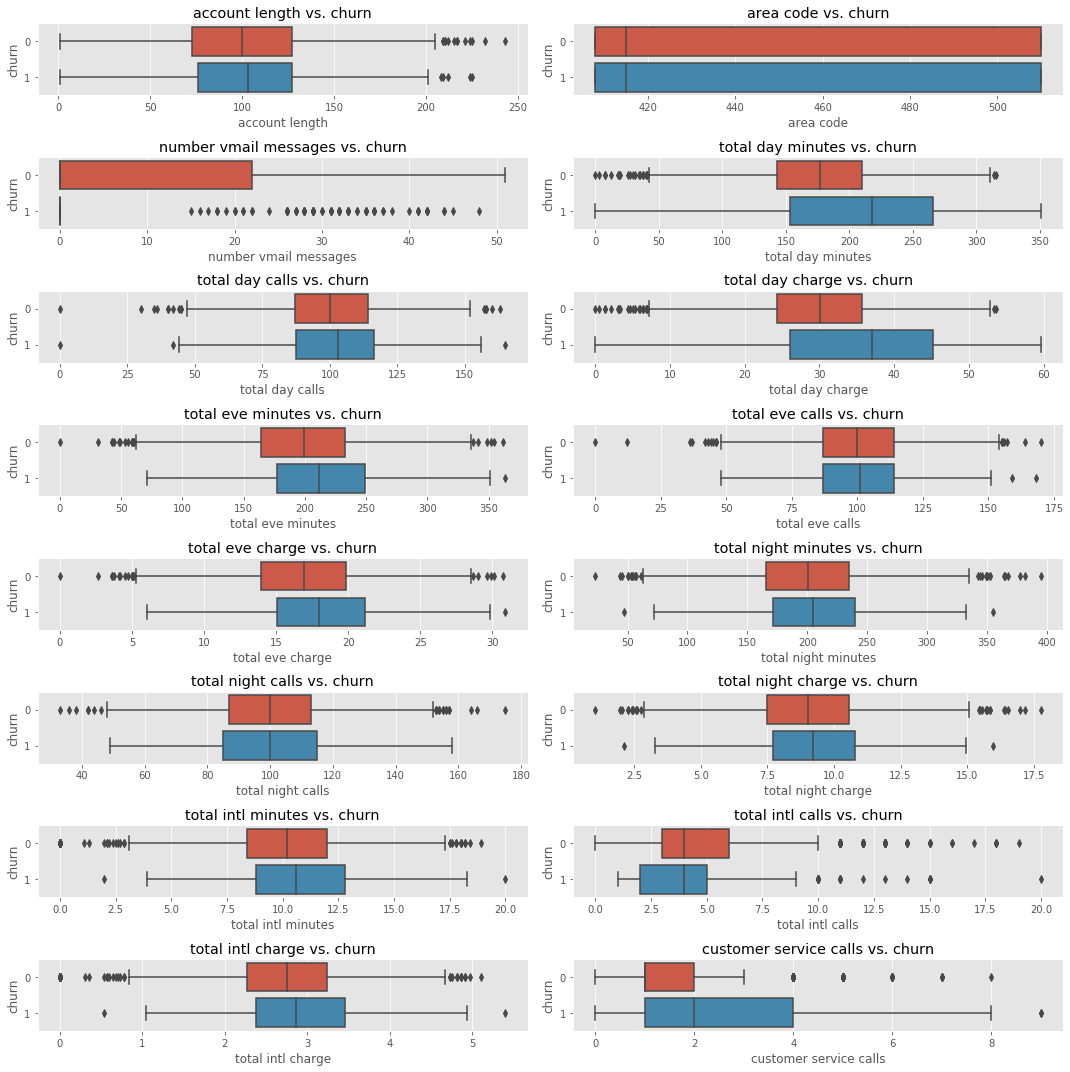

In [53]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 15))
for ax, feat in zip(axes.flatten(), num_cols):
    sns.boxplot(x=feat, y=df['churn'].astype('category'), data=df, ax=ax)
    ax.set_title(f'{feat} vs. churn')
plt.tight_layout()

From the above boxplots, account length, area code, total day calls, total eve calls, total night calls, and total intl calls seem more or less equally distributed among those that churned and those that did not. This indicates that these features might not be good predictors for our target (churn).  

The following variables did not appear to be equally distributed among those that churned and those that did not churn, signifying these might be better predictors for our model.  Additionally, the below text highlights findings from the above.

 - Number of Voicemail Messages: it looks like the number of vmail messages is distributed closer to 0 for those that churned - - a higher number of voicemail messages may indicate a lower likelihood to churn
 - Total Day Minutes / Total Day Charge: those that churned were associated with higher median day minutes / charges
 - Total Eve Minutes / Total Eve Charge: those that churned were associated with higher median eve minutes / charges
 - Total Night Minutes / Total Night Charge: those that churned were associated with higher median night minutes / charges
 - Total Intl Minutes / Total Intl Charge: those that churned were associated with higher median intl minutes / charges
 - Customer Service Calls: those that churned were associated with higher median customer service calls, which may indicate dissatisfaction with service received

In [54]:
# crosstabs created above for cat columns - - create and plot crosstab for customer service calls
service_call_crosstab = pd.crosstab(df['customer service calls'], df['churn'], normalize='index')
service_call_crosstab

churn                          0         1
customer service calls                    
0                       0.868006  0.131994
1                       0.896698  0.103302
2                       0.885375  0.114625
3                       0.897436  0.102564
4                       0.542169  0.457831
5                       0.393939  0.606061
6                       0.363636  0.636364
7                       0.444444  0.555556
8                       0.500000  0.500000
9                       0.000000  1.000000

In [55]:
# plot 
service_call_churn = service_call_crosstab[1]
service_call_churn = service_call_churn.reset_index()
service_call_churn.columns = ['customer service calls', 'churn_rate']

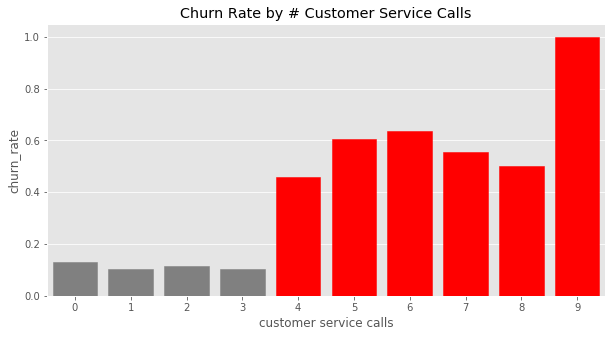

In [56]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(service_call_churn['customer service calls'], service_call_churn['churn_rate'], color='red')
plt.title("Churn Rate by # Customer Service Calls")

for bar in ax.patches:
    if bar.get_height() >= 0.20:
        bar.set_color('red')
    else:
        bar.set_color('grey')

plt.show()

In [57]:
# using the same threshold we used before on states, we can see that churn rate jumps with the 4th customer 
# service call, with ~50% of customers churning with customer service calls between 4 and 8, with ~100% churning 
# after 9 customer service calls

In [58]:
# heatmap of correlations, to see which predictors are related to each other
corr = df.corr()
corr

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha

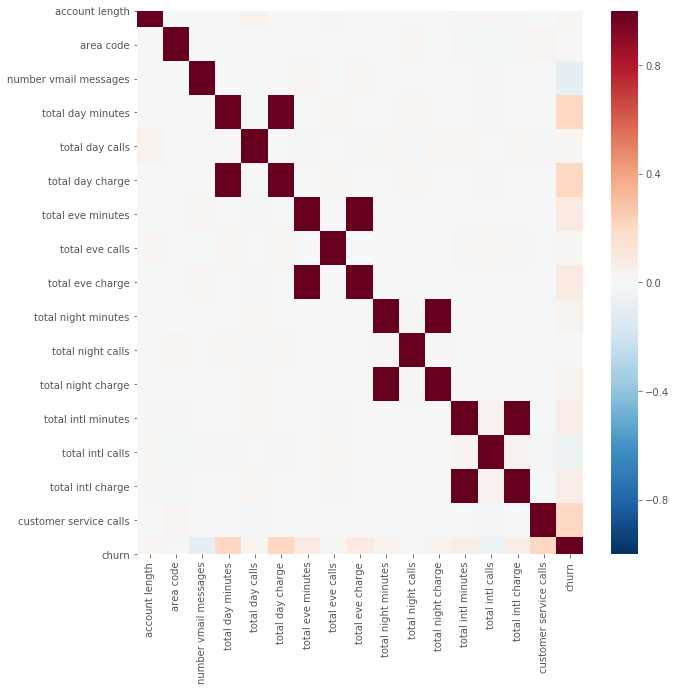

In [59]:
# turn to a heatmap to better visualize
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu_r', annot=False, vmax=1, vmin=-1)
plt.show()

From the above heatmap, we can confirm that total intl minutes is perfectly correlated with total intl charge; total night charge is perfectly correlated with total night minutes; total eve minutes is perfectly correlated with total eve charge; and total day minutes is perfectly correlated with total day charge.

Additionally, we can see the following relationships:

- number of vmail messages is slightly negatively correlated with churn
- total day minutes / charge is positively correlated with churn
- total eve minutes is slightly postively correlated with churn
- customer service calls are positively correlated with churn

This information will be helpful as we start to think about which predictors to use in our model

In [60]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [61]:
# now that we have a good understanding of the data already provided, see relationship of a few new variables that
# might be helpful
# new variables will include total non-international calls (day + eve + night), 
# total calls (total non-international calls + intl calls)
# total charges (including and excluding international)
# total average talk time (minutes / call) both including and excluding international calls

In [62]:
# Total non-intl calls 
df['all_non_intl_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
df['all_calls'] = df['all_non_intl_calls'] + df['total intl calls']
df['all_non_intl_mins'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['all_mins'] = df['all_non_intl_mins'] + df['total intl minutes']
df['avg_non_intl_call_time'] = df['all_non_intl_mins'] / df['all_non_intl_calls']
df['avg_call_time'] = df['all_mins'] / df['all_calls']

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [64]:
# boxcharts for new variables vs. churn to see how they relate
new_cols = ['all_non_intl_calls', 'all_calls', 'all_non_intl_mins', 
            'all_mins', 'avg_non_intl_call_time', 'avg_call_time']

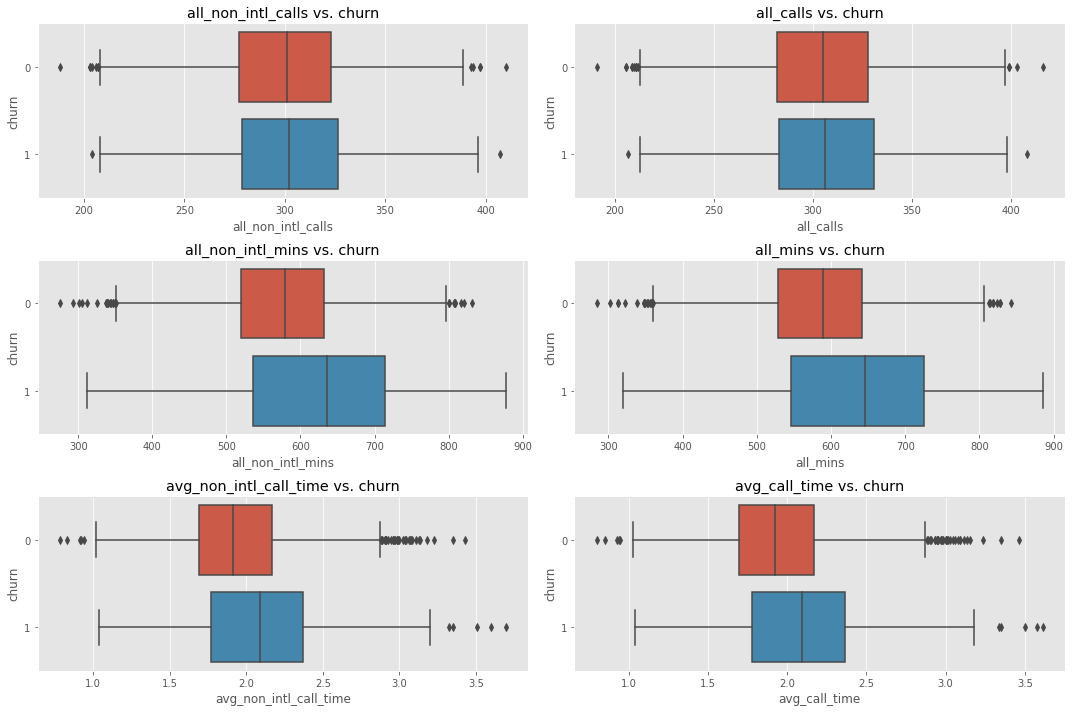

In [65]:
# translate churn column into 1 if they churn and 0 if not
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for ax, feat in zip(axes.flatten(), new_cols):
    sns.boxplot(x=feat, y=df['churn'].astype('category'), data=df, ax=ax)
    ax.set_title(f'{feat} vs. churn')
plt.tight_layout()

The number of total calls, both including and excluding international calls appear to be equally distributed between those that churned and those that did not churn. 

Total minutes and total non international minutes showed a higher median minute number for those that churned vs. those that did not churn.

There also appears to be a relationship between average call time (both intl and non-intl) and churn, with those churning having a higher median average call time.

In [66]:
# examine how many customers have positive voicemail numbers but not voicemail plan and see how this relates
# to churn
voicemails_with_no_plan = df.loc[(df['number vmail messages'] > 0) & (df['voice mail plan'] == False)]
voicemails_with_no_plan

Empty DataFrame
Columns: [state, account length, area code, phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, customer service calls, churn, all_non_intl_calls, all_calls, all_non_intl_mins, all_mins, avg_non_intl_call_time, avg_call_time]
Index: []

[0 rows x 27 columns]

In [67]:
# examine how many customers have positive intl minutes but no international plan
intl_mins_with_no_plan = df.loc[(df['total intl minutes'] > 0) & (df['international plan'] == False)]
intl_mins_with_no_plan

Empty DataFrame
Columns: [state, account length, area code, phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, customer service calls, churn, all_non_intl_calls, all_calls, all_non_intl_mins, all_mins, avg_non_intl_call_time, avg_call_time]
Index: []

[0 rows x 27 columns]

There are no instances of customers having postive voicemail balances with no voicemail plan and positive international minutes and no international plan.  There may have been a correlation to customers being charged more for plans they did not have, but that does not appear to be the case.

Now that we have aa good understanding of the data, we can start to prepare things for preprocessing and modeling.

### 3. Data Preparation
 - Detecting and dealing with missing values
 - Data type conversions (e.g. numeric data mistakenly encoded as strings)
 - Checking for and removing multicollinearity (correlated predictors)
 - Normalizing our numeric data
 - Converting categorical data to numeric format through one-hot encoding

In [68]:
# check for and deal with any missing values or duplicates
# reload raw dataset to start data preparation clean

In [69]:
# set random seed
SEED = 923

In [70]:
raw_df = df.copy()
raw_df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total intl calls  total intl charge  \
0             45.07  ...                 3               2.70   
1             27.47  ...                 3               3.70   
2             41.38  ...                 5               3.29   
3             50.90  ...                 7               1.78   
4             28.34  ...                 3               2.73   

   customer service calls  churn  all_non_intl_calls  all_calls  \
0                       1      0                 300        303   
1                       1      0                 329        332   
2                       0      0                 328        333   
3                       2      0                 248        255   
4                       3      0                 356        359   

   all_non_intl_mins  all_mins  avg_non_intl_call_time  avg_call_time  
0              707.2     717.2                2.357333       2.366997  
1              611.5     625.2                1.858663       1.883133  
2              527.2     539.4                1.607317       1.619820  
3              558.2     564.8                2.250806       2.214902  
4              501.9     512.0                1.409831       1.426184  

[5 rows x 27 columns]

In [71]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [72]:
# check for missing values and duplicates
raw_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
all_non_intl_calls        0
all_calls                 0
all_non_intl_mins         0
all_mins                  0
avg_non_intl_call_time    0
avg_call_time             0
dtype: int64

In [73]:
raw_df.duplicated().any()

False

There are no missing values or duplicates within our dataset. We will now move on to handling any data type conversions that were not handled in the EDA portion above.

In [74]:
clean_df = raw_df.copy()

In [75]:
# drop all charge columns as these correlate perfectly with respective minutes columns
clean_df.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)

In [76]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [77]:
# feature selection using EDA above to select features that appear related to churn
predictors = ['state', 'account length', 'international plan', 'voice mail plan',
              'number vmail messages', 'total day minutes', 'total eve minutes', 
              'total night minutes', 'total intl minutes', 'customer service calls', 
              'all_non_intl_calls', 'all_calls', 'all_non_intl_mins', 'all_mins', 
              'avg_non_intl_call_time', 'avg_call_time']

In [78]:
# before any further preprocessing, split into stratified test-train set so there is no data leakage
# split data into test_train_split before further preprocessing to avoid any data leakage
from sklearn.model_selection import train_test_split

# split raw dataset into X and y
X = clean_df[predictors]
y = clean_df['churn']
final_clean_df = pd.concat([X, y], axis=1)

# create train and test sets, stratify to keep proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, stratify=y)

In [79]:
# one hot encode
from sklearn.preprocessing import OneHotEncoder

# create transformer
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)

# fit and transform training state data
X_train_state_encoded = ohe.fit_transform(X_train[['state']])
X_train_state_encoded = pd.DataFrame(X_train_state_encoded, columns=ohe.categories_[0], index=X_train.index)

# repeat for test data
X_test_state_encoded = ohe.transform(X_test[['state']])
X_test_state_encoded = pd.DataFrame(X_test_state_encoded, columns=ohe.categories_[0], index=X_test.index)

In [80]:
# drop initial state column from both test and train data, and concat with remaining features
X_train = X_train.drop('state', axis=1)
X_test = X_test.drop('state', axis=1)

X_train_ohe = pd.concat([X_train, X_train_state_encoded], axis=1)
X_test_ohe = pd.concat([X_test, X_test_state_encoded], axis=1)

In [81]:
# label encode voice mail plan and international plan
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode international plan
X_train_ohe['intl_plan_encoded'] = le.fit_transform(X_train_ohe['international plan'])
X_test_ohe['intl_plan_encoded'] = le.transform(X_test_ohe['international plan'])

# encode voicemail plan
X_train_ohe['vm_plan_encoded'] = le.fit_transform(X_train_ohe['voice mail plan'])
X_test_ohe['vm_plan_encoded'] = le.transform(X_test_ohe['voice mail plan'])

# drop original columns
X_train_encoded = X_train_ohe.drop(['international plan', 'voice mail plan'], axis=1)
X_test_encoded = X_test_ohe.drop(['international plan', 'voice mail plan'], axis=1)

X_train_final = X_train_encoded.copy()
X_test_final = X_test_encoded.copy()

In [82]:
# all our columns are now numeric - - can begin scaling.

In [83]:
# scale data using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

Handle any class imbalance

In [84]:
# handle class imbalance with SMOTE
from imblearn.over_sampling import SMOTE

print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

0    2137
1     362
Name: churn, dtype: int64
0    0.855142
1    0.144858
Name: churn, dtype: float64


/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [85]:
# If our model were to guess every customer as a non-churn customer, it would be right 85.5% of the time
# use SMOTE to create synthetic training data and rebalance the data set
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_final, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 
print('\n')
print(pd.Series(y_train_resampled).value_counts(normalize=True))

1    2137
0    2137
dtype: int64


1    0.5
0    0.5
dtype: float64


In [86]:
# resample scaled training data
X_train_resampled_scaled, y_train_resampled_scaled = SMOTE().fit_resample(X_train_scaled, y_train)

# confirm that we are balanced now
print(pd.Series(y_train_resampled_scaled).value_counts())
print(pd.Series(y_train_resampled_scaled).value_counts(normalize=True))

1    2137
0    2137
dtype: int64
1    0.5
0    0.5
dtype: float64


In [87]:
# resampled training data is now balanced

### 4. Modeling
 - Is this a classification task? A regression task? Something else?
 - What models will we try?
 - How do we deal with overfitting?
 - Do we need to use regularization or not?
 - What sort of validation strategy will we be using to check that our model works well on unseen data?
 - What loss functions will we use?
 - What threshold of performance do we consider as successful?

This is a classification task, trying to predict if a customer will (soon churn).  As a result, we will be focused on a number of classification models and will iterate through a number of potential models / hyperparameters to arrive at the optimal model for our task.

Models we will try include:
- Decision Trees: will be especially helpful as decision trees can help with feature importance and identification of certain feature splits, etc. 
- K-Nearest Neighbors: will need to be careful to ensure we are using scaled data for distance formulas
- Ensemble Methods including random forests and boosting algorithms

We have now taken steps to understand the data available to us, as well as, preprocessed and prepared the data for modeling.  Before running our models, we should decide which performance metrics will be used to compare each of our iterations.  For each model, I will be generating the following metrics:

 - Accuracy: total number of correct predictions out of total observations.  
 - Recall: number of true positives out of actual total positives. Out of all the customers we saw that churned, what percentage of them did our model correctly identifying as churning?
 - Precision: number of true positives out of predicted positives.  Out of all the times, our models said a patient would churn, how many times did the customer in question actually churn?
 - F1 Score: harmonic mean of precision and recall. Can't be high unless recall and precision are high. 
 - ROC Graphs and AUC: AUC is an alternative comprehensive metric and ROC graphs allow us to find an optimal precision, recall tradeoff.  ROC graphs plot true positive rate vs. false positive rate
 
In the context of the telecommunications company churn, we will likely want to focus on a model that produces high recall, and will likely care more about our true positive rate vs. false positive rate.  It is important our model identifies potential churn customers properly, and it is probably ok to generate a few false positives and identify a customer as churning when they are not going to in reality.  Customer outreach, special promotions, etc. can be targeted at customers our model identifies as churning, and the downside to providing these benefits to a customer that isn't going to churn is just not that material.  

In [88]:
# import metrics libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# define function to produce classification metrics - will help with iterative modeling
def print_model_scores(X_train, X_test, y_train, y_test, model):
    """
    Function to return accuracy, recall, precision, f1, roc_auc, and neg_log_loss from given X_train, X_test, y_train, y_test, and fit model.
    """
    # create predictions using model
    y_test_preds = model.predict(X_test)
    y_train_preds = model.predict(X_train)
    
    # accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_preds)
    test_accuracy = accuracy_score(y_test, y_test_preds)
    
    # precision score
    train_precision = precision_score(y_train, y_train_preds)
    test_precision = precision_score(y_test, y_test_preds)
    
    # recall score
    train_recall = recall_score(y_train, y_train_preds)
    test_recall = recall_score(y_test, y_test_preds)
    
    # f1 score
    train_f1 = f1_score(y_train, y_train_preds)
    test_f1 = f1_score(y_test, y_test_preds)
    
    # roc_auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_preds)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # log loss
    log_loss = -cross_val_score(model, X_train, y_train, scoring='neg_log_loss', cv=5).mean()
    
    print('Accuracy:')
    print(f'Training Set: {train_accuracy}')
    print(f'Test Set: {test_accuracy}')
    print('---------------------------------')
    print('Precision:')
    print(f'Training Set: {train_precision}')
    print(f'Test Set: {test_precision}')
    print('---------------------------------')
    print('Recall:')
    print(f'Training Set: {train_recall}')
    print(f'Test Set: {test_recall}')
    print('---------------------------------')
    print('F1 Score:')
    print(f'Training Set: {train_f1}')
    print(f'Test Set: {test_f1}')
    print('---------------------------------')
    print(f'ROC AUC: {roc_auc}')
    print('---------------------------------')
    print(f'Log Loss: {log_loss}')
    
    test_results = pd.DataFrame([[f'{model}', test_accuracy, test_precision, test_recall, test_f1, roc_auc, log_loss]],
                                columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Log Loss'])
    
    return test_results


This is a classification task, trying to predict whether a customer will churn or not. In terms of metrics to focus on, we will likely care more about False Positives than False Negatives, as False Positives can be given customer support / additional resources to prevent them from churning, even if they were not going to churn to begin with.  Would be worse to misidentify a customer as staying and have them churn out. 

In [89]:
# the first model will be a decision tree as this can help determine feature importance
from sklearn.tree import DecisionTreeClassifier

dtree_baseline_model = DecisionTreeClassifier(random_state=SEED)
dtree_baseline_model.fit(X_train_resampled, y_train_resampled)
dtree_baseline_results = print_model_scores(X_train_resampled, X_test_final, y_train_resampled, y_test, dtree_baseline_model)

Accuracy:
Training Set: 1.0
Test Set: 0.9040767386091128
---------------------------------
Precision:
Training Set: 1.0
Test Set: 0.6413793103448275
---------------------------------
Recall:
Training Set: 1.0
Test Set: 0.768595041322314
---------------------------------
F1 Score:
Training Set: 1.0
Test Set: 0.6992481203007518
---------------------------------
ROC AUC: 0.8478318825124893
---------------------------------
Log Loss: 2.658137210333634


After running our baseline model, we see that we are getting ~89.69% accuracy on our testing set.  This is a slight improvement over a simple model that guessed "False" for every customer, which showed accuracy closer to 85%.  In terms of the metric we are most likely interested in, recall is at 65.2% for our baseline decision tree model.  This means that out of all the customers that churned, our model correctly identified ~65.2% of them. Clearly there is some room for improvement.  Further, we see an AUC of 79.6% on testing data.  Looking at our training scores, the large difference between testing and training sets shows our models are overfitting to training data.  To fix this, we will tune hyperparameters and prune trees to try and offset this overfitting. 

In [90]:
dtree_baseline_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.904077   0.641379   

     Recall  F1 Score       AUC  Log Loss  
0  0.768595  0.699248  0.847832  2.658137

In [91]:
# before moving on to different types of models, try tuning hyperparameters to find an optimal model
# again we will be looking to maximize recall
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 2, 5, 10, 15, 20]
}

dt_grid_search = GridSearchCV(dtree_baseline_model, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=923,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 

In [92]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test_final, y_test)

In [93]:
print(f'Mean Training Score: {dt_gs_training_score}')
print(f'Mean Testing Score: {dt_gs_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 0.6239290150171137
Mean Testing Score: 0.8381294964028777
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

In [94]:
# rerun model with these parameters
best_dt_model = DecisionTreeClassifier(criterion='gini', 
                                       max_depth=None,
                                       max_features=None,
                                       min_samples_leaf=0.1,
                                       min_samples_split=0.1)
best_dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
best_dt_model_results = print_model_scores(X_train_resampled, X_test_final, y_train_resampled, y_test, best_dt_model)

Accuracy:
Training Set: 0.8406644829199813
Test Set: 0.8381294964028777
---------------------------------
Precision:
Training Set: 0.8382899628252788
Test Set: 0.46634615384615385
---------------------------------
Recall:
Training Set: 0.8441740758072064
Test Set: 0.8016528925619835
---------------------------------
F1 Score:
Training Set: 0.8412217300069946
Test Set: 0.5896656534954408
---------------------------------
ROC AUC: 0.8229863340790282
---------------------------------
Log Loss: 0.3858522871489145


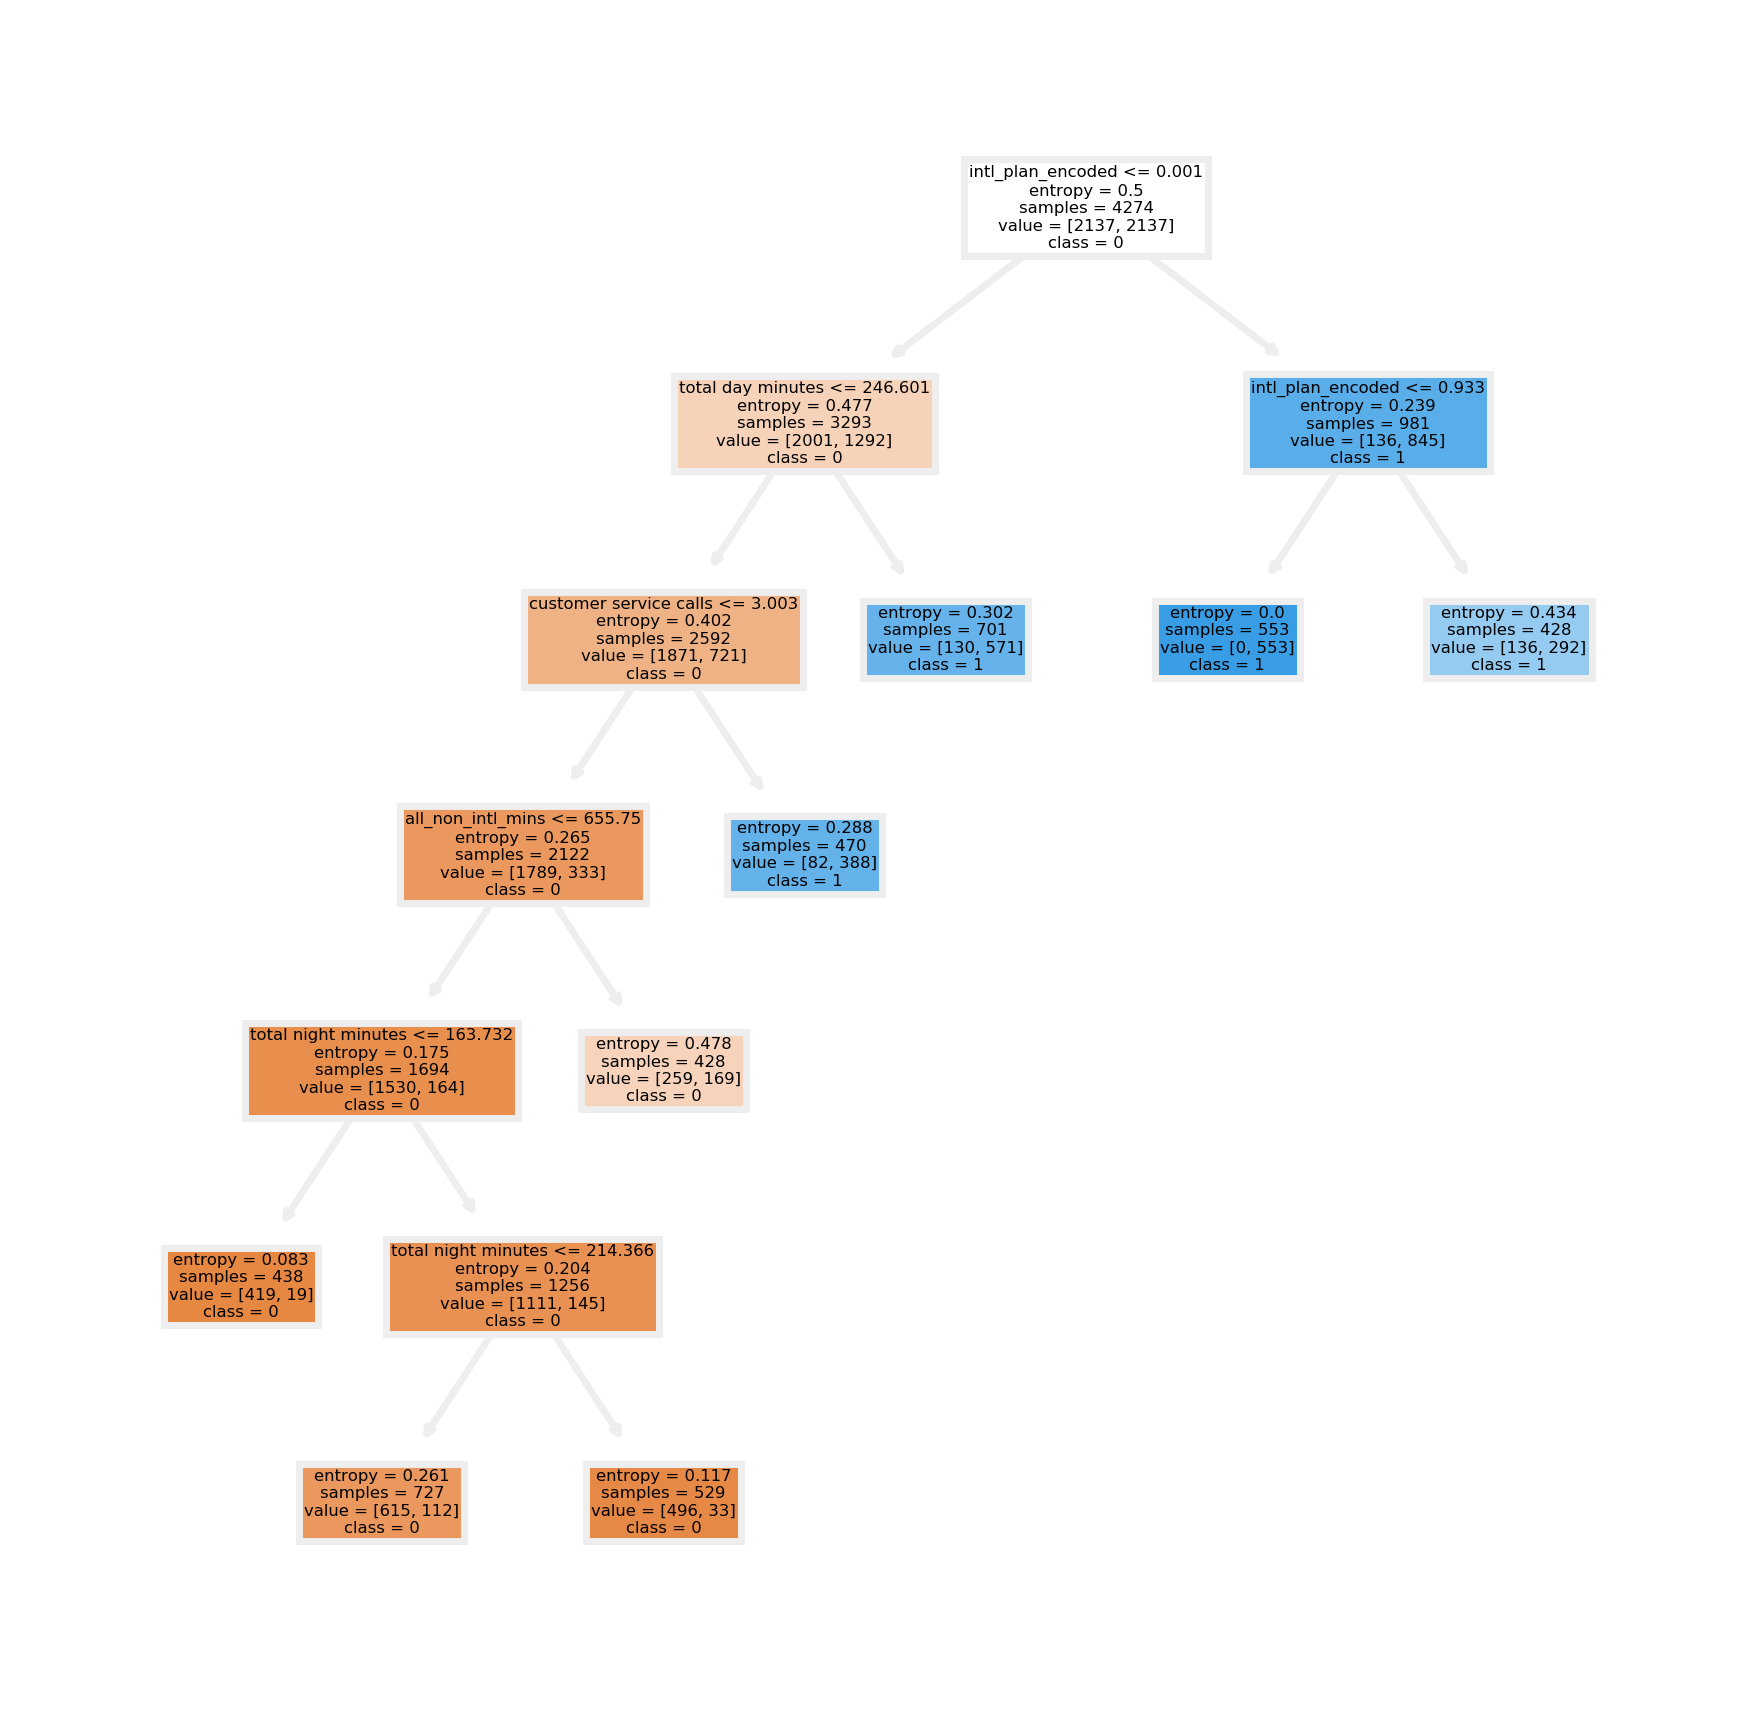

In [96]:
# evaluate splits of tree, etc. 
from sklearn import tree
plt.figure(figsize=(2,2), dpi=1000)
tree.plot_tree(best_dt_model, feature_names=X_train_final.columns, class_names=np.unique(y).astype('str'), 
               filled=True)
plt.show()

In [97]:
dtree_baseline_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.904077   0.641379   

     Recall  F1 Score       AUC  Log Loss  
0  0.768595  0.699248  0.847832  2.658137

In [98]:
best_dt_model_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.838129   0.466346   

     Recall  F1 Score       AUC  Log Loss  
0  0.801653  0.589666  0.822986  0.385852

Comparing our gridsearch DT final results to our baseline results, we can see that while overall accuracy has dropped slightly from 89.6% to 83.8%, along with a drop in precision, our recall has significantly improved from 65.2% to 80.1%.  Additionally, we do not appear to be overfitting as much as we were before with training set recall of 83.9% and testing recall fairly close at 80.2%.  As we are most likely interested in recall, these results are pretty good.

In [99]:
# check feature importances
best_dt_model.feature_importances_

array([0.        , 0.        , 0.28552516, 0.        , 0.007662  ,
       0.        , 0.30936653, 0.        , 0.        , 0.05458953,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.34285678,
       0.        ])

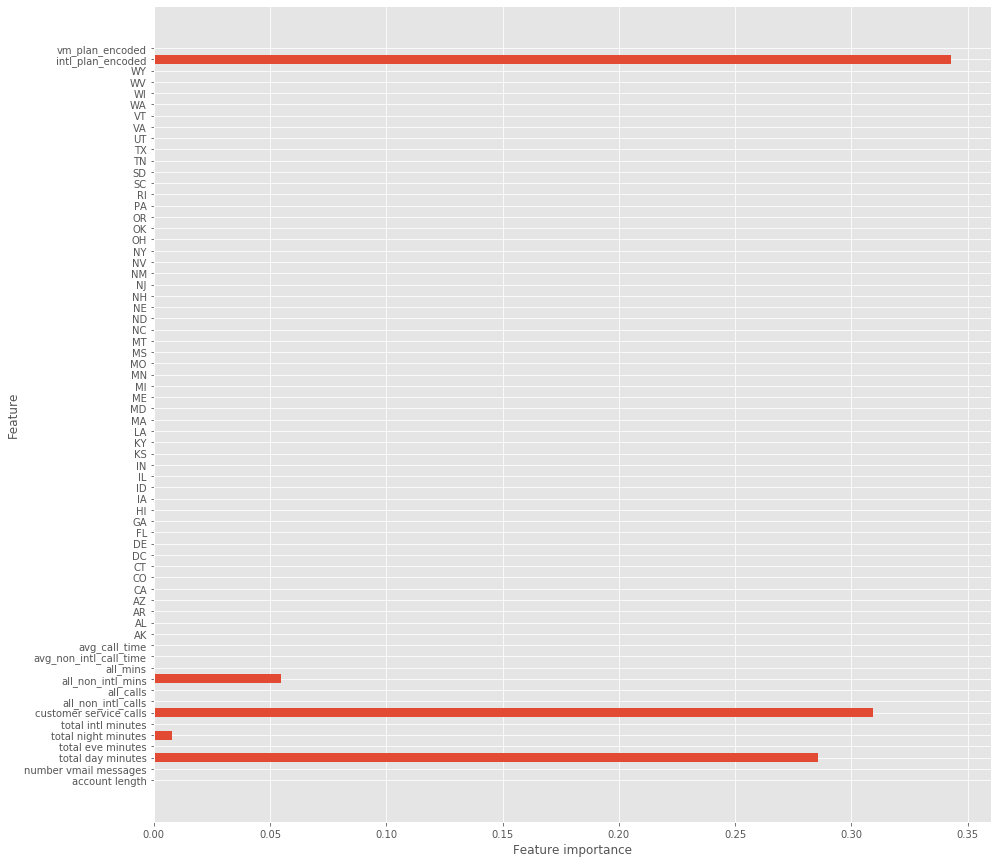

In [100]:
# convert to visualization to better understand
def plot_feature_importances(model, X_train, y_train):
    """
    Function to plot feature importances from a given model
    """
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(best_dt_model, X_train_final, y_train)

Feature importances show international plan, all minutes, customer service calls, and total day minutes.

In [101]:
# try training a KNN Classifier now
from sklearn.neighbors import KNeighborsClassifier

knn_baseline_model = KNeighborsClassifier()
knn_baseline_model.fit(X_train_resampled_scaled, y_train_resampled_scaled)
knn_baseline_results = print_model_scores(X_train_resampled_scaled, X_test_scaled, y_train_resampled_scaled, y_test, knn_baseline_model)

Accuracy:
Training Set: 0.9085166120729995
Test Set: 0.7194244604316546
---------------------------------
Precision:
Training Set: 0.8517324738114423
Test Set: 0.2784313725490196
---------------------------------
Recall:
Training Set: 0.9892372484791764
Test Set: 0.5867768595041323
---------------------------------
F1 Score:
Training Set: 0.9153496427798224
Test Set: 0.37765957446808507
---------------------------------
ROC AUC: 0.66435617168755
---------------------------------
Log Loss: 1.1175418660678353


In [102]:
# again we can see that we are overfitting - - attempt to correct this by raising number of neighbors
# similar to the decision trees, find optimal KNN model and compare to baseline KNN as well as to our best DT Model
# in terms of speed, KNN is much faster
knn_param_grid = {
    'n_neighbors': [5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_grid_search = GridSearchCV(knn_baseline_model, knn_param_grid, cv=3, return_train_score=True)

# Fit to the data
knn_grid_search.fit(X_train_resampled_scaled, y_train_resampled_scaled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [103]:
# Mean training score
knn_gs_training_score = np.mean(knn_grid_search.cv_results_['mean_train_score'])

# Mean test score
knn_gs_testing_score = knn_grid_search.score(X_test_scaled, y_test)

print(f'Mean Training Score: {knn_gs_training_score}')
print(f'Mean Testing Score: {knn_gs_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
knn_grid_search.best_params_

Mean Training Score: 0.9375162831000723
Mean Testing Score: 0.7302158273381295
Best Parameter Combination Found During Grid Search:


{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [104]:
# run model with these hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')
best_knn_model.fit(X_train_resampled_scaled, y_train_resampled_scaled)
best_knn_results = print_model_scores(X_train_resampled_scaled, 
                                      X_test_scaled, 
                                      y_train_resampled_scaled, 
                                      y_test, 
                                      best_knn_model)

Accuracy:
Training Set: 1.0
Test Set: 0.7302158273381295
---------------------------------
Precision:
Training Set: 1.0
Test Set: 0.2796610169491525
---------------------------------
Recall:
Training Set: 1.0
Test Set: 0.5454545454545454
---------------------------------
F1 Score:
Training Set: 1.0
Test Set: 0.3697478991596639
---------------------------------
ROC AUC: 0.6535126864720131
---------------------------------
Log Loss: 0.7577793870362317


In [105]:
knn_baseline_results

Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.719424   0.278431   

     Recall  F1 Score       AUC  Log Loss  
0  0.586777   0.37766  0.664356  1.117542

In [106]:
best_knn_results

Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.730216   0.279661   

     Recall  F1 Score       AUC  Log Loss  
0  0.545455  0.369748  0.653513  0.757779

In [107]:
best_dt_model_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.838129   0.466346   

     Recall  F1 Score       AUC  Log Loss  
0  0.801653  0.589666  0.822986  0.385852

While accuracy is slightly better, our models are still overfitting significantly.  Performance continues to be worse with the KNN model. Try re-running grid search with n_neighbors set to 50 to see if it helps address overfitting. 

In [108]:
knn_10_neighbors = KNeighborsClassifier(n_neighbors=50)
knn_10_neighbors.fit(X_train_resampled_scaled, y_train_resampled_scaled)
knn_10_results = print_model_scores(X_train_resampled_scaled, X_test_scaled, y_train_resampled_scaled, y_test, knn_10_neighbors)

Accuracy:
Training Set: 0.7220402433317735
Test Set: 0.6414868105515588
---------------------------------
Precision:
Training Set: 0.7115470352206866
Test Set: 0.18214285714285713
---------------------------------
Recall:
Training Set: 0.7468413664014975
Test Set: 0.4214876033057851
---------------------------------
F1 Score:
Training Set: 0.7287671232876712
Test Set: 0.25436408977556113
---------------------------------
ROC AUC: 0.5501547413443372
---------------------------------
Log Loss: 0.6220682375730056


Running with a higher number of neighbors, we can see that our train and test accuracy are closer in value to each other, signifying our overfitting may be slightly addressed. Our decision tree model still seems to be vastly outperforming our KNN classifier, so for now we will stick with our best_dt_model as the optimal until we see one better.

In [109]:
# attempt to use feature importances from DTree to produce better KNN results
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   float64
 1   number vmail messages   2499 non-null   float64
 2   total day minutes       2499 non-null   float64
 3   total eve minutes       2499 non-null   float64
 4   total night minutes     2499 non-null   float64
 5   total intl minutes      2499 non-null   float64
 6   customer service calls  2499 non-null   float64
 7   all_non_intl_calls      2499 non-null   float64
 8   all_calls               2499 non-null   float64
 9   all_non_intl_mins       2499 non-null   float64
 10  all_mins                2499 non-null   float64
 11  avg_non_intl_call_time  2499 non-null   float64
 12  avg_call_time           2499 non-null   float64
 13  AK                      2499 non-null   float64
 14  AL                      2499 non-null   

In [110]:
selected_X_train_scaled = X_train_scaled[['intl_plan_encoded', 'all_mins', 'customer service calls', 'total night minutes', 'total day minutes']]
selected_X_test_scaled = X_test_scaled[['intl_plan_encoded', 'all_mins', 'customer service calls', 'total night minutes', 'total day minutes']]

In [111]:
# resample to handle class imbalance
selected_X_train_resampled_scaled, y_train_resampled_scaled = SMOTE().fit_resample(selected_X_train_scaled, y_train)

In [112]:
# rerun baseline KNN with smaller set of features from DT
knn_selected_features = KNeighborsClassifier()
knn_selected_features.fit(selected_X_train_resampled_scaled, y_train_resampled_scaled)
knn_selected_features_results = print_model_scores(selected_X_train_resampled_scaled, 
                                                   selected_X_test_scaled,
                                                   y_train_resampled_scaled, 
                                                   y_test,
                                                   knn_selected_features)

Accuracy:
Training Set: 0.930276087973795
Test Set: 0.8261390887290168
---------------------------------
Precision:
Training Set: 0.8884664131812421
Test Set: 0.44642857142857145
---------------------------------
Recall:
Training Set: 0.984089845577913
Test Set: 0.8264462809917356
---------------------------------
F1 Score:
Training Set: 0.9338365896980462
Test Set: 0.5797101449275363
---------------------------------
ROC AUC: 0.8262666187567372
---------------------------------
Log Loss: 1.0217341081125835


Using our feature importances identified in our Decision Tree, we can see our model is performing better.  The model is no longer overfitting as much from an accuracy perspective, and recall test results are a lot stronger now.  Additionall AUC is at 81.3%. Let's compare this to our best DT model. 

In [113]:
knn_selected_features_results

Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.826139   0.446429   

     Recall  F1 Score       AUC  Log Loss  
0  0.826446   0.57971  0.826267  1.021734

In [114]:
# let's rerun gridsearch using our amended features to see if we can improve results
knn_param_grid_2 = {
    'n_neighbors': [5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_grid_search_2 = GridSearchCV(knn_selected_features, knn_param_grid_2, cv=3, return_train_score=True)

# Fit to the data
knn_grid_search_2.fit(selected_X_train_resampled_scaled, y_train_resampled_scaled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [115]:
# Mean training score
knn_gs_2_training_score = np.mean(knn_grid_search_2.cv_results_['mean_train_score'])

# Mean test score
knn_gs_2_testing_score = knn_grid_search_2.score(selected_X_test_scaled, y_test)

print(f'Mean Training Score: {knn_gs_2_training_score}')
print(f'Mean Testing Score: {knn_gs_2_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
knn_grid_search.best_params_

Mean Training Score: 0.9534067841002839
Mean Testing Score: 0.8357314148681055
Best Parameter Combination Found During Grid Search:


{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [116]:
# rerun KNN with these hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

# fit model
best_knn_model.fit(selected_X_train_resampled_scaled, y_train_resampled_scaled)

# get scores
best_knn_results = print_model_scores(selected_X_train_resampled_scaled, 
                                      selected_X_test_scaled,
                                      y_train_resampled_scaled,
                                      y_test,
                                      best_knn_model)

Accuracy:
Training Set: 1.0
Test Set: 0.8357314148681055
---------------------------------
Precision:
Training Set: 1.0
Test Set: 0.46190476190476193
---------------------------------
Recall:
Training Set: 1.0
Test Set: 0.8016528925619835
---------------------------------
F1 Score:
Training Set: 1.0
Test Set: 0.5861027190332327
---------------------------------
ROC AUC: 0.8215838095348487
---------------------------------
Log Loss: 0.8353151457130028


We are still overfitting, but testing results are getting better.  Looking at recall, we have improved to ~81%, along with testing accuracy of 84% and AUC of 82.7%.  Let's compare our test results to that of our best decision tree

In [117]:
best_knn_results

Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='auto', leaf_si...  0.835731   0.461905   

     Recall  F1 Score       AUC  Log Loss  
0  0.801653  0.586103  0.821584  0.835315

In [118]:
best_dt_model_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.838129   0.466346   

     Recall  F1 Score       AUC  Log Loss  
0  0.801653  0.589666  0.822986  0.385852

The results on our test set to do not look too different, however, looking at our test results in comparison to our training sets, it looks like our KNN is overfitting more.  For this reason, we will stick with our DTree model as the best for now.  Move on to using Ensemble Methods like Random Forests and XGBoost to see if we can improve results further.

In [119]:
# Begin training Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# build baseline random forest with max_depth set to 5 and n_estimators set to 100
baseline_random_forest = RandomForestClassifier(max_depth=5, n_estimators=100)
baseline_random_forest.fit(X_train_resampled, y_train_resampled)
baseline_rf_results = print_model_scores(X_train_resampled, 
                                         X_test_final, 
                                         y_train_resampled,
                                         y_test,
                                         baseline_random_forest)

Accuracy:
Training Set: 0.9211511464670098
Test Set: 0.8932853717026379
---------------------------------
Precision:
Training Set: 0.9373177842565598
Test Set: 0.6081081081081081
---------------------------------
Recall:
Training Set: 0.9026672905942911
Test Set: 0.743801652892562
---------------------------------
F1 Score:
Training Set: 0.9196662693682957
Test Set: 0.6691449814126393
---------------------------------
ROC AUC: 0.8312276146650747
---------------------------------
Log Loss: 0.4107323165973833


In [120]:
# compare with our best single tree results
baseline_rf_results

Model  Accuracy  Precision  \
0  RandomForestClassifier(bootstrap=True, class_w...  0.893285   0.608108   

     Recall  F1 Score       AUC  Log Loss  
0  0.743802  0.669145  0.831228  0.410732

In [121]:
best_dt_model_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.838129   0.466346   

     Recall  F1 Score       AUC  Log Loss  
0  0.801653  0.589666  0.822986  0.385852

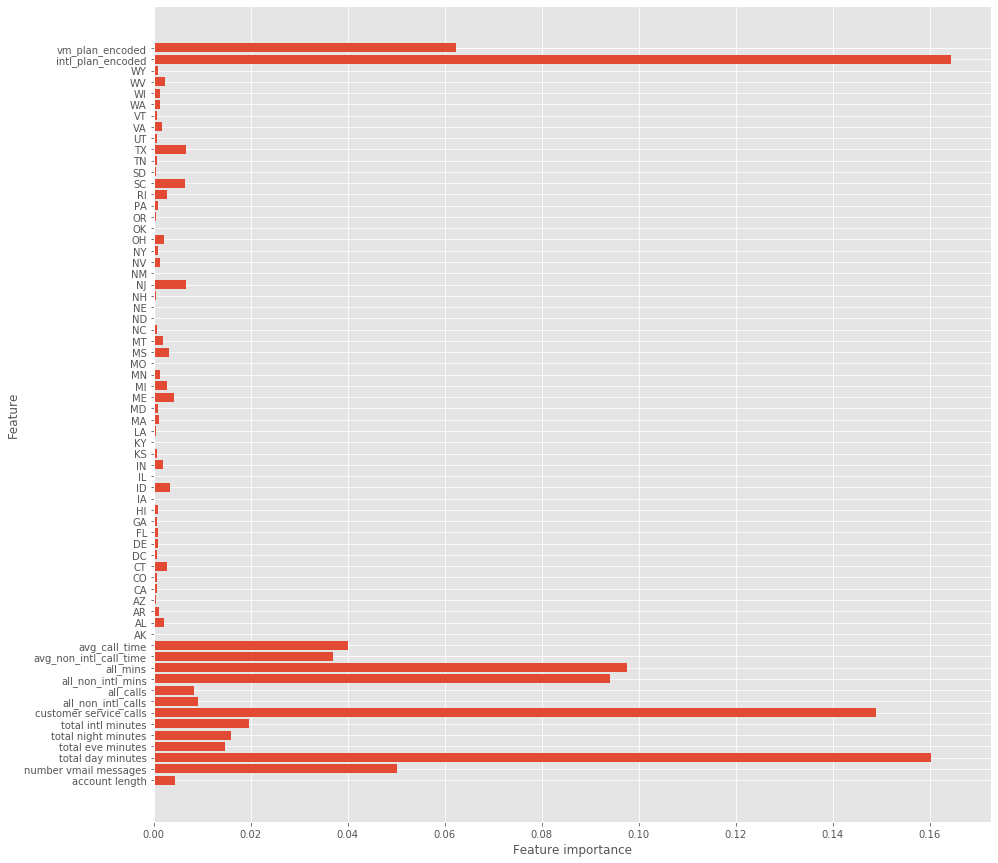

In [122]:
plot_feature_importances(baseline_random_forest, X_train_final, y_train)

In [123]:
# tune hyperparameters
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.05],
    'n_estimators': [100]
}

rf_grid_search = GridSearchCV(baseline_random_forest, rf_param_grid, cv=3, return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn

In [124]:
# Mean training score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test_final, y_test)

print(f'Mean Training Score: {rf_gs_training_score}')
print(f'Mean Testing Score: {rf_gs_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 0.819679636884815
Mean Testing Score: 0.8441247002398081
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.1,
 'n_estimators': 100}

In [125]:
# best rf model
best_rf = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 max_depth=7,
                                 min_samples_leaf=0.01,
                                 min_samples_split=0.1)
best_rf.fit(X_train_resampled, y_train_resampled)
best_rf_results = print_model_scores(X_train_resampled,
                                     X_test_final,
                                     y_train_resampled,
                                     y_test,
                                     best_rf)

Accuracy:
Training Set: 0.8773982218062705
Test Set: 0.8501199040767387
---------------------------------
Precision:
Training Set: 0.874245939675174
Test Set: 0.48947368421052634
---------------------------------
Recall:
Training Set: 0.8816097332709406
Test Set: 0.768595041322314
---------------------------------
F1 Score:
Training Set: 0.8779123951537745
Test Set: 0.5980707395498392
---------------------------------
ROC AUC: 0.8162750802684501
---------------------------------
Log Loss: 0.420896494066494


In [126]:
baseline_rf_results

Model  Accuracy  Precision  \
0  RandomForestClassifier(bootstrap=True, class_w...  0.893285   0.608108   

     Recall  F1 Score       AUC  Log Loss  
0  0.743802  0.669145  0.831228  0.410732

In [127]:
best_rf_results

Model  Accuracy  Precision  \
0  RandomForestClassifier(bootstrap=True, class_w...   0.85012   0.489474   

     Recall  F1 Score       AUC  Log Loss  
0  0.768595  0.598071  0.816275  0.420896

In [128]:
best_dt_model_results

Model  Accuracy  Precision  \
0  DecisionTreeClassifier(class_weight=None, crit...  0.838129   0.466346   

     Recall  F1 Score       AUC  Log Loss  
0  0.801653  0.589666  0.822986  0.385852

Using our tuned random forest model, compared to our best decision tree model, we can see that we have improved results slightly.  Accuracy on testing set has improved by ~3%, precision and f1 are both up, and recall is higher by 2.6% as well.  Based on these results, the best model so far is the random forest model.  

In [129]:
best_overall_model = best_rf
best_overall_model_results = best_rf_results

### 5. Evaluation
